# A Tale of Two Cities

## About the Project
In 2011 The CDC created the social vulnerability index (SVI).  The SVI is a scale that predicts the vulnerability of a population in the event of an emergency or natural disaster. COVID is the first global pandemic since the development of this measure. We evaluated the association between SVI score and COVID case count between San Antonio and Dallas, Texas.  Using modeling, we were able to identify localized community-specific and highly vulnerable subgroups.  It was observed that the most vulnerable subgroups in San Antonio included persons over 25 years of age with no high school diploma, minority status (non-white), institutional group homes, and those who are generally unemployed.  In Dallas, these groups focused on minority populations, those over 25 years of age with no high school diploma, and individuals that are identified as having limited English proficiency (LEP).  While SVI shared a strong correlation (.55) with COVID case count per 100k in San Antonio, this correlation was not observed in Dallas (.19).  This finding suggests that resources would be well allocated in San Antonio using the SVI index, but in Dallas, that correlation does not hold. We hope that our work helps to better inform our local government about specific sub-populations were aid allocation should be prioritized.
  
### Goals

*Goal # 1* - Evaluate the association between SVI score and COVID case count in San Antonio and Dallas, Texas.

*Goal # 2* - Evaluate the correlation between raw SVI score and case count per 100k.

*Goal # 3* - Compare and contrast the patterns observed between SVI score and COVID case count. 

*Goal # 4* - Predict local communities most at risk for COVID infection using SVI score.

*Goal # 5* - To identify subgroups inside identified communities that need particular attention or focused support.

### Background
The SVI (Social Vulnerability Index) was developed to help city governments and first responders predict areas that are particularly vulnerable in emergencies to prioritize resources to help regions at high risk (CDC's Social Vulnerability Index, 2020). The CDC's Social Vulnerability Index (CDC SVI) uses 15 U.S. census variables to classify census tracts with a composite score between 0 and 1 (lower scores = less vulnerability, higher score = greater vulnerability. This score is calculated by first ranking every census tract, in every country, in every state, in the United States. Those ranked tracks are then broken up into four themes (socioeconomic status, household composition, disability, minority status and language, household type, and transportation) and reclassified.  This overall score is then tallied by summing the themed percentiles and ranked between 0 and 1.  

While SVI was designed to help city governments respond to emergencies, the systems' efficacy has never been tested in response to a global pandemic. COVID-19 is a disease caused by a new coronavirus called SARS-CoV-2. WHO first learned of this new virus on 31 December 2019, following a report of a cluster of cases of 'viral pneumonia' in Wuhan, People's Republic of China. (World Health Organization, 2020). As of 9 December 2020, more than 68.4 million cases have been confirmed, with more than 1.56 million deaths attributed to COVID-19. 

Separated by 274 miles San Antonio and Dallas are two cities that share both comparable population sizes and SVI scores. Cities will be evaluated separately and then together for comparison.  

### Initial Thoughts & Hypotheses

1. Is the average number of COVID cases per 100k is the same across CDC SVI Range Categories?

2. Is there a correlation between raw_svi and the number of cases per 100k?

3. Is SVI a useful feature for predicting the number of cases per 100k?

4. Are the individual components of SVI better at predicting COVID cases, then the rank score?

5. Are the features identified in modeling consistent across communities (similar size and SVI score)?

### Work Plan

**Data Collection** 
- What data, if we had it, would solve the problem right away?
    - Cases count per 100K by census tract with SVI metrics nationally would be ideal
- What data do we have access to?
    - Have SVI from CDC by census track
    - Have Bexar county case count per 100K by zip code for single date 12/8/20
    - Collected median case count by zip code from Dallas dashboard on 12/8/20
- What additional data would be good to have?
    - be great to have more data by zip code instead of only county level
- What data would be impossible to collect?
    - due to privacy/panic concerns case data at the census tract level is not being published for open access
- What are the best proxies you can find for unavailable or impossible data?
    - find a way to translate from census tract to zip code
- What are the legal or ethical issues you might run into if you were to try to collect all of the types of data you would like to work with?
    - considered web scraping for zip code level data where specific information is not available
    - likely better to hard code existing data that is publicly available

**Machine Learning Model**
- What ML paradigm are you working in? (Classification, Regression, Clustering, etc)
    - Regression - target continuous variable cases per 100k
    - Classification - redefine target variable into 4 ranks/classes
- What models are commonly used in this task?
    - Linear Regression, LassoLars, Polynomial Features, Tweedie Regressor, etc.
    - Random Forest, Decision Tree, K Nearest Neighbors (KNN), etc.
* What other solutions are being tried in this field?
    - Did not see other research related to SVI as predictor for pandemic specifically
    - Index is used commonly for Hurricanes
* What special considerations need to be taken when dealing with these models? (i.e., imbalanced classes, text preprocessing, data leakage, etc)
    - possibly imbalanced classes in classification modeling, will need to verify distribution
* How will you know that your models work?
    - Establish a Baseline for each type of model 
    - Regression: will predict the mean value and calculate the MAE (Mean Absolute Error)
    - Regression: compare MAE of model vs baseline, model works is it has lower MAE than baseline
    - Classification: predict the most common rank for all observations and take the percentage that are correct
    - Classification: if the model accuracy is better than the Baseline the model works


### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scripts_python import wrangle, explore, model_MAE



![Prepare](https://i.pinimg.com/564x/4b/a8/7f/4ba87f73e9018ba611b1f9b11895eb20.jpg)

### Acquire
We acquired SVI data from the CDC's website and downloaded COVID data for San Antonio and Dallas from the cities' respective COVID data web portals. We developed programmatic solutions to translate federal FIPS codes into discernible local Zip Codes to merge the data.  Using the HUD crosswalk we found the Zip Code that accounted for the highest percentage of addresses within the tract and assigned that as the tract's sole Zip Code. This allowed us to merge the tables by matching them to a tract. The ratio of addresses for the census tract was then used to calculate cases per 100K measure for each tract.

### Wrangle
Twenty-nine features were selected and renamed for clarity to prepare the data for exploration. Observations associated with military bases were removed from the data frame. Binning the raw SVI score created a bin_svi column and a rank_svi column. The bin_svi column returns a label (low, low-mod, mod-high, high) in relation to the raw_svi score, while the rank_svi column is a numeric representation of SVI (1 representing a high score, four representing a low score). Prepared data was split into train and test for later modeling with cross-validation.  Numeric columns were scaled using sklearn's MinMaxScaler.  Six data frames were returned at the end of wrangle, including *train_explore* for exploration and individual scaled data frames for modeling  *X_train_scaled, y_train, X_test_scaled, y_test*.

# Individual City Analysis

- Examine Bexar county and Dallas county individually through the Acquire, Prepare, Explore, and Modeling stages
- Click on the city skyline to go to the notebook for that city

[**San Antonio**](https://github.com/SVI-Capstone/svi_capstone/blob/main/final-sa.ipynb)
[![San_Antonio_skyline](https://st.depositphotos.com/1231639/2885/v/600/depositphotos_28856081-stock-illustration-san-antonio-city-skyline-silhouette.jpg)](https://github.com/SVI-Capstone/svi_capstone/blob/main/final-sa.ipynb)

[**Dallas**](https://github.com/SVI-Capstone/svi_capstone/blob/main/final-dallas.ipynb)        
[![Dallas_skyline](https://static8.depositphotos.com/1231639/956/v/600/depositphotos_9560130-stock-illustration-dallas-texas-skyline-detailed-vector.jpg)](https://github.com/SVI-Capstone/svi_capstone/blob/main/final-dallas.ipynb)

# Explore Comparisons and Conclusions

Exploration focused on answering questions regarding the relationship between the CDC's range category SVI score and cases of COVID-19 per 100k.

**Hypothesis Testing**     
Question One: Is there a correlation between the CDC's Range Category SVI Score and COVID-19 Infection Cases per 100k Individuals?
We first visualized this relationship then conducted statistical testing to validate this observation. Due to the difference in variance in the data we performed a non-parametric ANOVA test (Kruskal). The confidence interval was set at 99% and returned a p-value less than alpha, requiring us to reject the null hypothesis and accept the alternate hypothesis that the average number of COVID-19 cases per 100k is significantly different across all CDC SVI range categories.

Question Two: Is there a correlation between raw_svi and cases per 100k?
This testing was performed using Pearson's correlation coefficient test at a confidence interval of 99%, and returned an r-value (correlation coefficient) of .55 for San Antonio and .29 for Dallas. This test also returned a p-value less than alpha, allowing us to reject the null hypothesis and accept the alternate hypothesis that there * a statistically significant difference* between raw_svi and cases per 100K.

We then visualized the distribution of cases and SVI scores. When viewed with hue = svi_cat distinct boundaries were observed separating range categories. Dispersed clustering within categories was observed, with the most significant variation occurring in the 'low' SVI vulnerability category. Several observations within this category were located outside the IQR and identified as outliers. We decided to keep these outliers in the dataset for further investigation time permitting.

The relationships between the distribution of cases and the number of specific SVI flags were examined. In San Antonio, a wide distribution of flags under the 'high' vulnerability category was observed. This suggested the need to identify subgroups inside identified communities where more focused assistance or support may be needed. 

Similar trends were observed in the Dallas dataset. The most significant difference is that flags' specific distribution under the 'high' vulnerability category change.  This unique distribution of flags per city suggests that while cities may use SVI to identify vulnerable communities, they may need alternate tools to key in on particularly vulnerable subgroups. 

After it was identified that unique flags might be used to better identify groupings within the data, an exploratory clustering analysis was performed. We hoped to use clustering to generate a new feature that could then be fed into a regression model.  Raw SVI data were examined, and three columns were identified as closely related to the prediction of COVID counts per 100k.  These features were e_pov (the estimate of persons below poverty), ep_pov (the percentage of persons below poverty), and spl_theme1 (the sum of features associated with socioeconomic themes).  These features were combined into a new feature identified as poverty_cluster.  This feature, along with centroids, were added to the data frame for modeling. 

**Takeaway:**


Summary of Hypothesis testing results here

`We can state with 99% certainty that there is a statistically significant difference between all of the CDC SVI Range Categories`

`We can state with 99% certainty that there is a statistically significant difference between raw_svi score and cases per 100K`

## Distribution Exploration

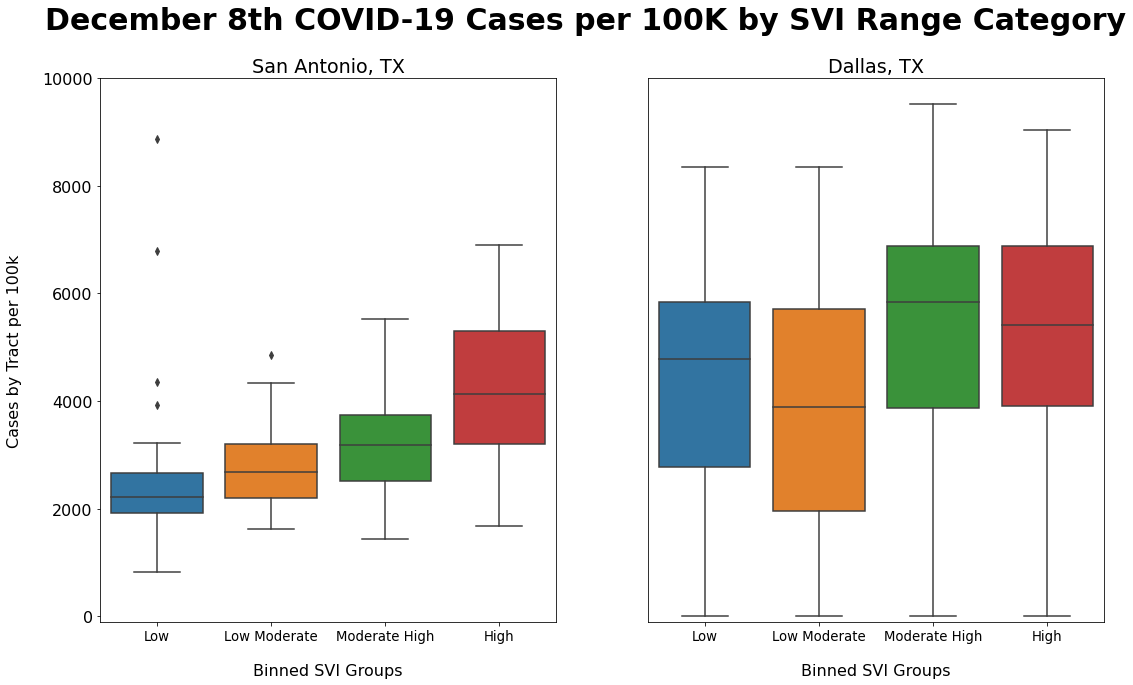

In [17]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('December 8th COVID-19 Cases per 100K by SVI Range Category', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_data()
ax1 = sns.boxplot(ax=axes[0], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax1.set_ylim([-100, 10000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("Binned SVI Groups",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_dallas_data()
ax2 = sns.boxplot(ax=axes[1], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax2.set_ylim([-100, 10000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("Binned SVI Groups",labelpad=20)

plt.show()

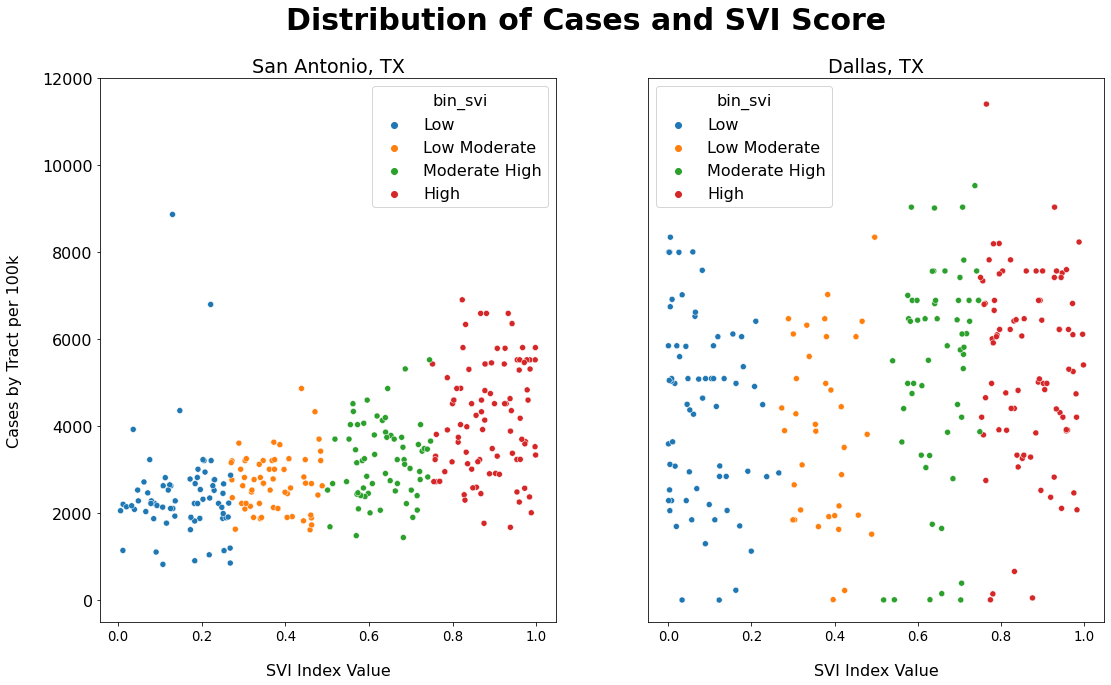

In [3]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('Distribution of Cases and SVI Score', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_data()
ax1 = sns.scatterplot(ax = axes[0],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax1.set_ylim([-500,12000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("SVI Index Value",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_dallas_data()
ax2 = sns.scatterplot(ax = axes[1],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax2.set_ylim([-500,12000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("SVI Index Value",labelpad=20)

plt.show()

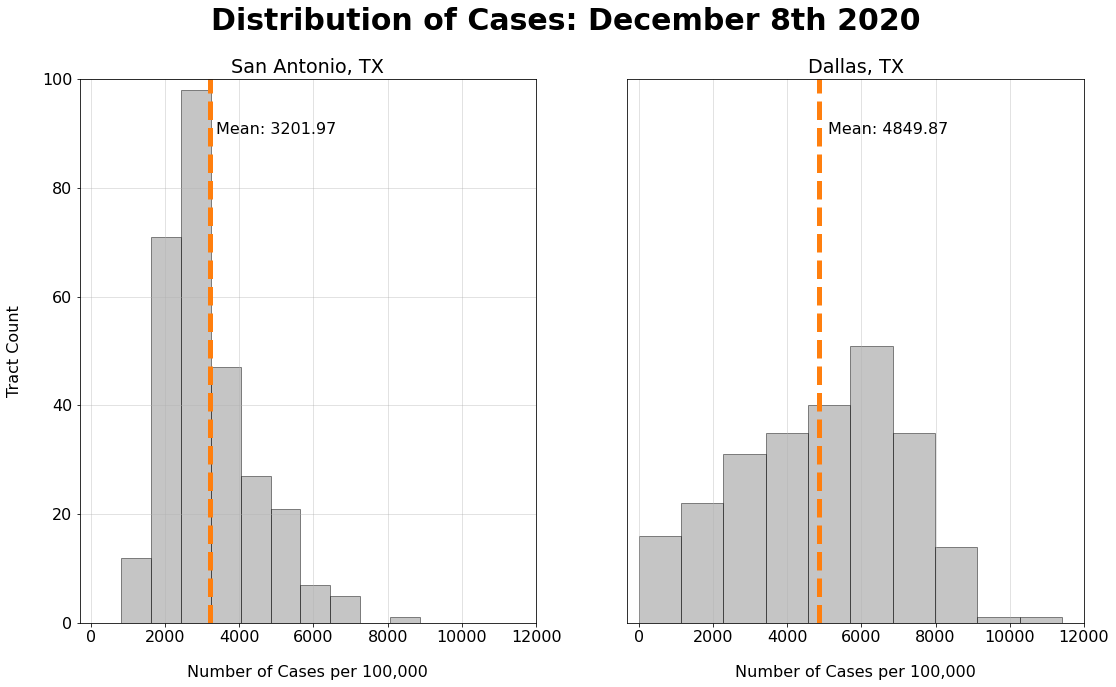

In [9]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.rc('font', size=16)
plt.suptitle('Distribution of Cases: December 8th 2020', fontsize=30, fontweight = 'bold')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_data()
plt.subplot(1,2,1)
plt.hist(x = train_exp.tract_cases_per_100k, 
               bins = 10, color = 'gray', 
               edgecolor='k', 
               alpha=0.45)
plt.title('San Antonio, TX')
plt.ylim(0, 100)
plt.xlim(-300, 12000)
plt.ylabel('Tract Count',labelpad=20)
plt.xlabel('Number of Cases per 100,000',labelpad=20)
plt.axvline(train_exp.tract_cases_per_100k.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(train_exp.tract_cases_per_100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(train_exp.tract_cases_per_100k.mean()))
plt.grid(b = True, alpha = .45)


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_dallas_data()
plt.subplot(1,2,2)
plt.hist(x = train_exp.tract_cases_per_100k, 
               bins = 10, color = 'gray', 
               edgecolor='k', 
               alpha=0.45)
plt.yticks([])
plt.title('Dallas, TX')
plt.ylim(0, 100)
plt.xlim(-300, 12000)
plt.xlabel('Number of Cases per 100,000',labelpad=20)
plt.axvline(train_exp.tract_cases_per_100k.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(train_exp.tract_cases_per_100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(train_exp.tract_cases_per_100k.mean()))
plt.grid(b = True, alpha = .45)
plt.show()


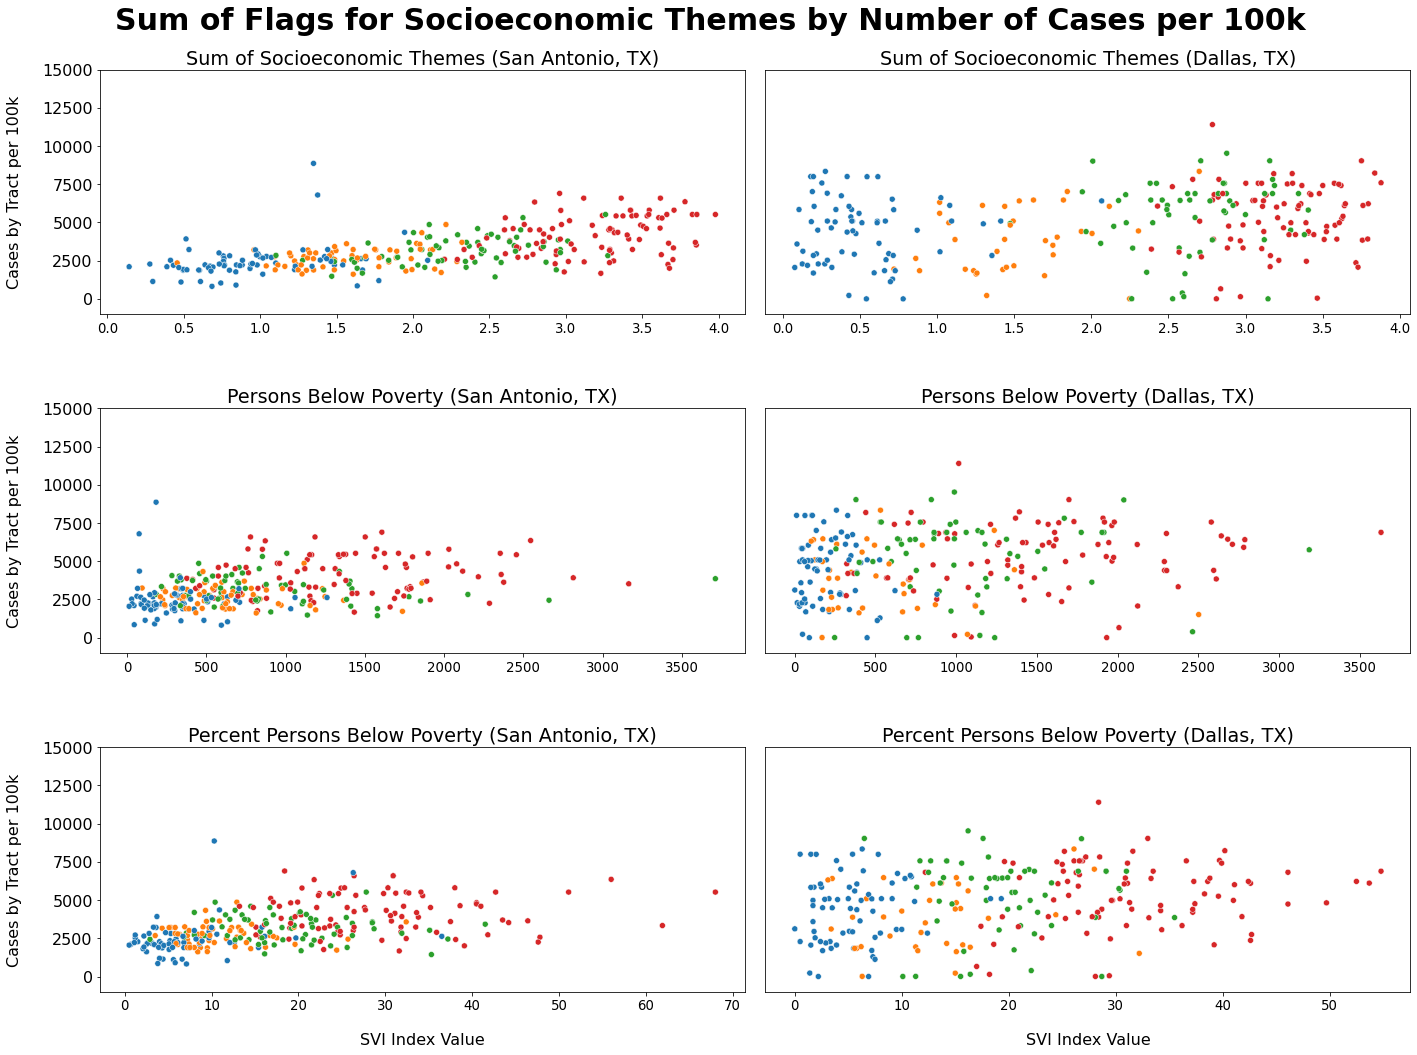

In [5]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
plt.rc('font', size=16)
plt.suptitle('Sum of Flags for Socioeconomic Themes by Number of Cases per 100k', fontsize=30, fontweight = 'bold')
axes[0,0].set_title('Sum of Socioeconomic Themes (San Antonio, TX)')
axes[1,0].set_title('Persons Below Poverty (San Antonio, TX)')
axes[2,0].set_title('Percent Persons Below Poverty (San Antonio, TX)')

axes[0,1].set_title('Sum of Socioeconomic Themes (Dallas, TX)')
axes[1,1].set_title('Persons Below Poverty (Dallas, TX)')
axes[2,1].set_title('Percent Persons Below Poverty (Dallas, TX)')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_data()
ax1 = sns.scatterplot(ax = axes[0,0],
                      x= 'spl_theme1', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax1.set_ylim([-1000, 15000])
ax1.xaxis.set_visible(True)
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel(" ",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


ax2 = sns.scatterplot(ax = axes[1,0],
                      x= 'e_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax2.set_ylim([-1000, 15000])
ax2.xaxis.set_visible(True)
ax2.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel(" ",labelpad=20)

ax3 = sns.scatterplot(ax = axes[2,0],
                      x= 'ep_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax3.set_ylim([-1000, 15000])
ax3.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax3.tick_params(axis ='x', labelsize ='small')
ax3.set_xlabel("SVI Index Value",labelpad=20)

#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.np_wrangle_dallas_data()

ax4 = sns.scatterplot(ax = axes[0,1],
                      x= 'spl_theme1', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax4.set_ylim([-1000, 15000])
ax4.xaxis.set_visible(True)
ax4.yaxis.set_visible(False)
ax4.tick_params(axis ='x', labelsize ='small')
ax4.set_xlabel(" ",labelpad=20)

ax5 = sns.scatterplot(ax = axes[1,1],
                      x= 'e_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax5.set_ylim([-1000, 15000])
ax5.xaxis.set_visible(True)
ax5.yaxis.set_visible(False)
ax5.tick_params(axis ='x', labelsize ='small')
ax5.set_xlabel(" ",labelpad=20)

ax6 = sns.scatterplot(ax = axes[2,1],
                      x= 'ep_pov', 
                      y= 'tract_cases_per_100k',
                      data = train_exp, 
                      hue= 'bin_svi',
                      legend = False)
ax6.set_ylim([-1000, 15000])
ax6.yaxis.set_visible(False)
ax6.tick_params(axis ='x', labelsize ='small')
ax6.set_xlabel("SVI Index Value",labelpad=20)
plt.tight_layout()
plt.show()

# Preprocessing

**Recursive Feature Elimination (RFE)**     
RFE was used to evaluate the features and rank them prior to modeling. This list of key features determined some of the combinations of features to model on. When this alone did not produce a very accurate model further Exploration, use of KMeans clustering, and analysis of trends in the SVI found additional features to model on.

**KMeans Clustering**     
Visualization of unique flags indicated that these might better identify groupings within the data. Raw SVI data showed three flags as closely related to the prediction of COVID counts per 100k. These features were the estimate of persons below poverty (e_pov), the percentage of persons below poverty (ep_pov), and the sum of features associated with socioeconomic themes (spl_theme1). Using KMeans clustering these features were combined into a new feature identified as poverty_cluster.

**SVI Trend Feature Engineering**      



# Model Comparisons and Conclusions

Two rounds of modeling were performed during this investigation. First, a regression model that assessed SVI's impact on the prediction of COVID cases per 100k, and second a classification model that assessed SVI's impact on case rank (defined as low cases, low_mod cases, mod_high cases, or high cases).

## Regression Model

The mean value for COVID cases per 100k was identified as the baseline for modeling. We used cross-validation instead of a three-way split into train, validate, and test datasets due to the dataset's limited size. The size of the dataset is limited by the number of census tracts in each city. Linear Regression and LassoLars algorithms were used to evaluate multiple combinations of feature selection. Of these, the LassoLars had the least MAE (mean absolute error) when using all of the possible features and was run on the out of sample (test) data. The MAE of a model is the mean of the individual prediction errors' absolute values over all instances in the test set. We chose to assess model performance in terms of MAE due to its ease of interpretation. San Antonio's top-performing model was a TweedieRegressor, using Top 4 features as identified by RFE. The model demonstrated a 21% improvement over baseline. Dallas' top-performing model was also a TweedieRegressor, using Top 4 features as determined by RFE. The model showed a 2% improvement over baseline.

## Classification Model

For the classification model, we ran a series of classification models using the Random Forest and KNN algorithms, which sought to use SVI components as features in the models to predict the severity of COVID cases based on our constructed rankings of point counts: Low, Low-Moderate, Moderate-High, and High bins. The mean value of the most common ranked bin was identified as the baseline for modeling. We found that our classification models' most useful features were also similar to the features we found as applicable in regression modeling. Using the Random Forest algorithm and using the top 4 RFE features, our best model yielded an accuracy result of 55%, which is an improvement over the baseline of 7% (or an increase in accuracy of 14.5%).

# SVI Trends San Antonio vs. Dallas

- 45% of the communities (tracts) in San Antonio are getting more vulnerable year over year from 2014 to 2018 vs. 39% of the communities in Dallas
- Additionally only 8% of the areas in San Antonio are seeing a year over year reduction in vulnerability ranking vs. 13% of communities in Dallas
- One key grouping in San Antonio that is getting worse year over year is socioeconomic subgroup. This includes below poverty, unemployed, income, and no High School diploma subgroups
    - San Antonio 38% getting worse vs. 30% in Dallas
- Another key group difference household composition and disability. This includes households with those aged 65 or older, aged 17 or younger, older than age 5 with a disability, and single-parent households.
    - San Antonio 30% getting worse vs. 25% in Dallas



![SVIgroupinglist](https://i.pinimg.com/564x/9f/72/9c/9f729cb5c1f459be93f3e1dccb56710f.jpg)

# Conclusions

1. Is the average number of COVID cases per 100k is the same across CDC SVI Range Categories?

Based on the Kruskal test, we are 99% confident that there is a significant difference between the average number of cases across the CDC SVI range categories in San Antonio and Dallas. This suggests that SVI is useful in predicting vulnerable communities during this pandemic and that SVI values should be examined as modeling features.

2. Is there a correlation between raw_svi and the number of cases per 100k?

Based on a Pearson R correlation test, we are 99% confident that there is a correlation between raw_svi and the number of cases per 100k in San Antonio and Dallas. This correlation does not suggest causation yet describes a linear relationship that exists between the two features. This relationship is characterized by a strong correlation in San Antonio (0.54) and a weaker yet still significant correlation in Dallas (0.19).

3. Is SVI a useful feature for predicting the number of cases per 100k?

Yes, in San Antonio. Using a TweedieRegressor with SVI as a feature, our model can predict the number of cases per 100k better than baseline (21%).

Yes, in Dallas. Using a TweedieRegressor with SVI as a feature, our model can predict the number of cases per 100k better than baseline (2%).

This observation suggests that while there are statistically significant correlations between SVI score and cases per 100k in San Antonio and Dallas, the SVI score's predictive power is more significant in San Antonio. Further investigation is necessary to explain this disparity.

4. Are the individual components of SVI better at predicting COVID cases than the rank score?

Yes, in San Antonio, individual SVI components are better than the raw or binned score at predicting cases per 100k. Three of the top features were derived from looking at how the SVI score has changed over time. In San Antonio, the top four features identified as necessary in predicting count per 100k included total socioeconomic themes, the change in SVI for minority and language subgroups, the change in SVI status between 2014 – 2018, and the average SVI score between 2014 -2018.

Yes, in Dallas, individual SVI components are better than the raw or binned score at predicting cases per 100k. In Dallas, the top four features identified as necessary in predicting count per 100k included the centroids of persons below poverty, percent of persons below poverty, and the scaled count of total socioeconomic themes. The only significant factor that was not derived from clustering was derived from the SVI change over time, the difference in SVI for minority and language subgroup.

These observations suggest that changes in SVI have a considerable influence on how our models perform. Local governments should consider the shift in SVI score over time when thinking about the distribution of aid, as communities that have seen improvement in SVI scores between 2014-2018 are less likely to need the number of resources that communities with stagnant scores will require.

5. Are the features identified in modeling consistent across communities (similar size and SVI score)?

In San Antonio and Dallas, COVID cases per 100k are greatest in communities where most residents are of minority status and lack educational opportunities (individuals >25 and no diploma). What is different about these two cities is the predictive ability SVI has on COVID case count. In San Antonio, resources would be well allocated using the SVI index, but in Dallas, that correlation does not hold. For two cities with the same approximate SVI score and population, this is an interesting observation that will require further research to understand better. Regardless we hope that our work helps to better inform our local government about specific sub-populations where aid allocation should be prioritized.


# Next Steps

Things that might be impacting disparity in San Antonio vs. Dallas index trends:
- Dallas might have programs in place that San Antonio does not to assist these at risk areas
- Redlining history and continued impact in San Antonio may be disproportionately effecting or stagnating improvements in areas in San Antonio